In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"../dataset/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df_final = df.drop('Car_Name',axis=1)

In [6]:
df_final["Current_Year"] = 2022
df_final["no_of_years"] = df_final["Current_Year"] - df_final["Year"]

In [7]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [8]:
df_final_2 = df_final.drop(['Year', 'Current_Year'],axis=1)

In [9]:
df_final_2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [10]:
df_final_2 = pd.get_dummies(df_final_2,drop_first=True,)
df_final_2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [11]:
corr_matrix = df_final_2.corr()
corr_matrix['Selling_Price'].sort_values()

Seller_Type_Individual   -0.550724
Fuel_Type_Petrol         -0.540571
Transmission_Manual      -0.367128
no_of_years              -0.236141
Owner                    -0.088344
Kms_Driven                0.029187
Fuel_Type_Diesel          0.552339
Present_Price             0.878983
Selling_Price             1.000000
Name: Selling_Price, dtype: float64

In [12]:
X = df_final_2.iloc[:, 1:]
Y = df_final_2.iloc[:,:1]

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [14]:
x_train.shape, x_test.shape

((240, 8), (61, 8))

In [15]:
x_train

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
234,5.70,4492,0,7,0,1,0,1
272,10.00,27600,0,7,0,1,0,1
265,8.70,21200,0,5,0,1,0,1
108,1.50,18000,0,6,0,1,1,1
10,3.60,2135,0,5,0,1,0,1
...,...,...,...,...,...,...,...,...
77,12.35,135154,0,18,0,1,0,0
60,18.61,40001,0,9,0,1,0,1
164,0.54,14000,0,6,0,1,1,1
4,6.87,42450,0,8,1,0,0,1


# Using Linear Regresion

In [16]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [17]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [18]:
predictions = linear_model.predict(x_test)
predictions

array([[ 7.43427969],
       [-1.95831997],
       [ 4.98531954],
       [ 6.87913432],
       [ 4.76743447],
       [18.29148029],
       [ 5.77551891],
       [ 6.85963149],
       [ 3.7887177 ],
       [10.30765741],
       [-0.76012905],
       [ 4.41323177],
       [ 1.32906571],
       [ 0.85535764],
       [11.08477738],
       [ 5.13132517],
       [ 9.90338542],
       [ 5.02910961],
       [ 7.40696872],
       [-0.1386522 ],
       [ 7.40816186],
       [ 0.67409978],
       [ 8.00448499],
       [ 2.21135213],
       [ 5.90919949],
       [14.04955157],
       [ 5.05685906],
       [ 1.35661427],
       [ 1.60048909],
       [ 0.76913373],
       [ 6.39643887],
       [ 9.05198586],
       [ 3.31101515],
       [-0.44953678],
       [ 4.77680435],
       [ 8.20167588],
       [ 4.98082146],
       [ 7.58117567],
       [20.54549682],
       [ 0.33801684],
       [ 0.14014961],
       [ 1.06130484],
       [ 6.7764639 ],
       [ 4.61826937],
       [ 4.07514804],
       [ 0

In [19]:
import seaborn as sns

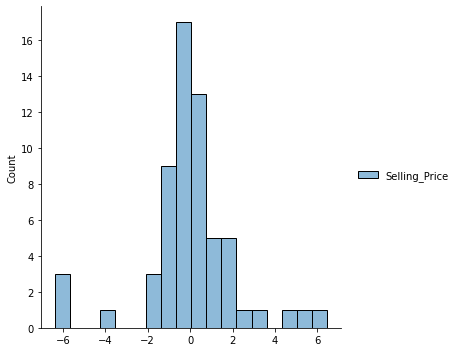

In [20]:
sns.displot(y_test-predictions)

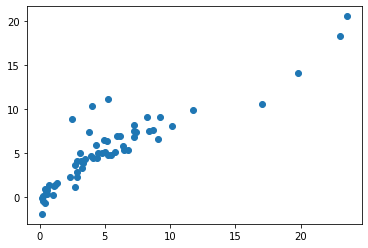

In [21]:
plt.scatter(y_test,predictions)

In [22]:
import pickle

In [23]:
file = open("linear_regression_model.pkl",'wb')
pickle.dump(linear_model,file)

file.close()

In [24]:
model_linearReg = pickle.load(open(r"linear_regression_model.pkl",'rb'))


In [36]:
pred_test = model_linearReg.predict(x_test.iloc[2:3,:])

In [37]:
x_test.iloc[2:3,:]

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
268,5.8,19000,0,5,0,1,0,1


In [38]:
pred_test.tolist()

[[4.985319541656207]]

In [39]:
model_linearReg.predict([[20.0, 10.4341158035983, 1, 7, 0, 1, 0, 1]])

/mnt/sda2/Coding-Projects/machineLearning/veichelDataEndToEnd/lightMLEnv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10.55383766]])

In [40]:
pred_test = pred_test.tolist()

In [42]:
round(pred_test[0][0],2)

4.99